In [1]:
pip install flaml

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np   
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split #, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from datetime import datetime
import time
import warnings
warnings.filterwarnings('ignore')

In [7]:
from flaml import AutoML
from flaml.data import get_output_from_log

In [8]:
import sys
sys.path.append("../")
import pandas as pd
from utils.data_utils import DataLoader

In [9]:
data_loader = DataLoader(file_path='../data/raw/car.data' , target_column='class', test_size=0.2, random_state=42)

In [11]:
data_loader.data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [13]:
X, y = data_loader.get_data()

In [19]:
automl = AutoML()
automl_settings = {
    "time_budget": 200,
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": 'automl.log',
    "model_history": True,
}

In [18]:
automl.set_multiclass_strategy('ovo')

AttributeError: 'AutoML' object has no attribute 'set_multiclass_strategy'

In [20]:
automl.fit(X_train=X, y_train=y, dataframe=data_loader, **automl_settings)

[flaml.automl.logger: 05-24 18:13:17] {1682} INFO - task = classification
[flaml.automl.logger: 05-24 18:13:17] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 05-24 18:13:17] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 05-24 18:13:17] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 05-24 18:13:17] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 05-24 18:13:17] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-24 18:13:17] {2336} INFO - Estimated sufficient time budget=1790s. Estimated necessary time budget=44s.
[flaml.automl.logger: 05-24 18:13:17] {2383} INFO -  at 0.2s,	estimator lgbm's best error=0.2998,	best estimator lgbm's best error=0.2998
[flaml.automl.logger: 05-24 18:13:17] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-24 18:13:18] {2383} INFO -  at 0.5s,	estimator lgbm's

In [21]:
best_model = automl.model
best_score = automl.best_loss
print(best_model)
print(best_score)

0.004052944625952915


In [22]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 89, 'num_leaves': 7, 'min_child_samples': 2, 'learning_rate': 1.0, 'log_max_bin': 6, 'colsample_bytree': 0.8753117050234628, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.7688978197446295}
Best accuracy on validation data: 0.9959
Training duration of best run: 0.106 s


In [23]:
automl.model.estimator

LGBMClassifier(colsample_bytree=0.8753117050234628, learning_rate=1.0,
               max_bin=63, min_child_samples=2, n_estimators=89, num_leaves=7,
               reg_alpha=0.0009765625, reg_lambda=1.7688978197446295,
               verbose=-1)

In [25]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=automl_settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 1728, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 1728, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.26770501231052046, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alpha': 0.001348364934537134, 'reg_lambda': 1.4442580148221913}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.26770501231052046, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_a

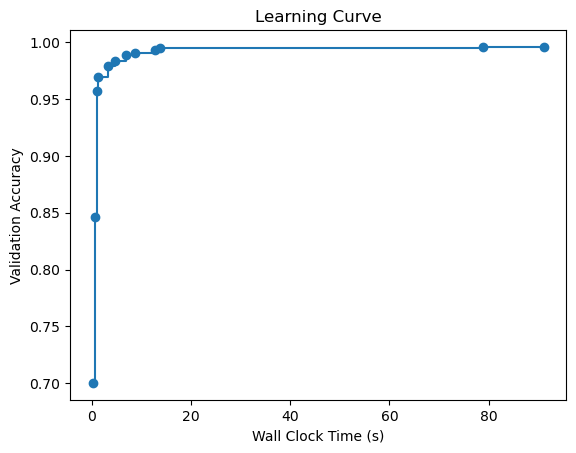

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()